### Low Risk Investment Options

##### Importing libraries

In [145]:
# Provides ways to work with large multidimensional arrays
import numpy as np
# Allows for further data manipulation and analysis
import pandas as pd
import yfinance as yf # read stock data
import matplotlib.pyplot as plt # plotting
import matplotlib.dates as mdates # styling dates

import datetime as dt # for defining dates
import mplfinance as mpf # matplotlif finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

##### Dates

In [146]:
PATH = "/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/python-for-finance/Stock List/"
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

E_YEAR = 2021
E_MONTH = 8
E_DAY = 18
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

##### Get Stock File Names in a List

In [147]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

['AIZ',
 'SYY',
 'PPL',
 'ETSY',
 'MTCH',
 'PARA',
 'HIG',
 'MMC',
 'IDXX',
 'NWSA',
 'ROP',
 'IT',
 'FDX',
 'J',
 'AES',
 'ZBH',
 'PYPL',
 'CVX',
 'GM',
 'MSFT',
 'TFC',
 'GEV',
 'KIM',
 'MU',
 'CBRE',
 'GE',
 'MTB',
 'PNR',
 'TXT',
 'AAL',
 'CMG',
 'LMT',
 'UPS',
 'MCK',
 'JKHY',
 'LDOS',
 'DAL',
 'QRVO',
 'DAY',
 'IVZ',
 'DGX',
 'CFG',
 'MPWR',
 'SPG',
 'JNJ',
 'SHW',
 'WMB',
 'FDS',
 'CPT',
 'GEHC',
 'PPG',
 'HES',
 'DPZ',
 'LKQ',
 'EBAY',
 'SRE',
 'RVTY',
 'EQR',
 'CI',
 'TFX',
 'CE',
 'BG',
 'COR',
 'MSCI',
 'STX',
 'FCX',
 'WMT',
 'GOOG',
 'TMUS',
 'JNPR',
 'KEYS',
 'VTRS',
 'FTNT',
 'FSLR',
 'ELV',
 'VRTX',
 'EQIX',
 'NEM',
 'TMO',
 'CEG',
 'ORLY',
 'TT',
 'BLDR',
 'IRM',
 'INCY',
 'STE',
 'MNST',
 'EXR',
 'EL',
 'EXC',
 'OKE',
 'EMN',
 'USB',
 'CNC',
 'CB',
 'WFC',
 'FOXA',
 'SYF',
 'HOLX',
 'LHX',
 'PG',
 'ADM',
 'ES',
 'AMD',
 'NUE',
 'TDY',
 'KMB',
 'HLT',
 'NI',
 'ROL',
 'APD',
 'TECH',
 'FMC',
 'GL',
 'ABBV',
 'FOX',
 'PAYX',
 'DLR',
 'RTX',
 'MPC',
 'RJF',
 'ESS',
 'VTR'

##### Function that returns a dataframe from a CSV

In [148]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + ".csv")
    except FileNotFoundError:
        print("File Does Not Exist")
    else:
        return df

##### Return Valid Dates in DataFrame

In [149]:
def get_valid_dates(df, sdate, edate):
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate)
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()

        date_leading = '-'.join(('0' if len(x) < 2 else '') + x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x) < 2 else '') + x for x in last_date.split('-')) 
    
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending

##### Returns Return on Investment Over Time

In [150]:
def roi_between_dates(df, sdate, edate):
    try:
        start_val = df.loc[sdate, 'Adj Close']
        end_val = df.loc[edate, 'Adj Close']
        roi = ((end_val - start_val) / (start_val))
    except Exception:
        print("Data Corrupted")
    else:
        return roi

##### Get Mean Between Dates

In [151]:
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]['Adj Close'].mean()

##### Get Standard Deviation Between Dates

In [152]:
def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]['Adj Close'].std()

##### Get coefficient of variation between dates

In [153]:
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean

##### Test Functions

In [154]:
tickers[0]

stock_a = get_df_from_csv('A')
stock_a

print(get_valid_dates(stock_a, '2020-01-01', '2020-12-31'))

sdate, edate = get_valid_dates(stock_a, '2020-01-01', '2020-12-31')

print(sdate, edate)
print("Adj Close Mean: ", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close SD: ", get_sd_between_dates(stock_a, sdate, edate))
print("Adj Close COV: ", get_cov_between_dates(stock_a, sdate, edate))
stock_a = stock_a.set_index(['Date'])
print("Return on Investment: ", roi_between_dates(stock_a, sdate, edate))
stock_a

('2020-01-02', '2020-12-31')
2020-01-02 2020-12-31
Adj Close Mean:  90.24404384976341
Adj Close SD:  13.564315151843795
Adj Close COV:  0.15030704047821053
Return on Investment:  0.38750008337310116


,Adj Close,daily_return
Date,,
2017-01-03,43.975952,NaN
2017-01-04,44.552967,0.013121
2017-01-05,44.023254,-0.011890
2017-01-06,45.394844,0.031156
2017-01-09,45.536739,0.003126
...,...,...
2021-08-12,155.331650,0.010414
2021-08-13,156.392395,0.006829
2021-08-16,159.181808,0.017836


##### COV and ROI for All Stocks over defined period

In [155]:
def get_cov_ror(tickers, sdate, edate):
    col_names = ['Ticker', 'COV', 'ROI']
    df = pd.DataFrame(columns=col_names)
    for ticker in tickers:
        print("Working on: ", ticker)
        s_df = get_df_from_csv(ticker)
        if s_df.empty:
            print(f"Data for this ticker: {ticker} not available")
            continue # skips execution of the below code for this loop
        s_date, e_date = get_valid_dates(s_df, sdate, edate)
        cov = get_cov_between_dates(s_df, s_date, e_date)
        s_df = s_df.set_index(['Date'])
        roi = roi_between_dates(s_df, s_date, e_date)
        df.loc[len(df.index)] = [ticker, cov, roi]
    return df

In [156]:
market_df = get_cov_ror(tickers, '2019-01-01', '2019-12-31')

Working on:  AIZ
Working on:  SYY
Working on:  PPL
Working on:  ETSY
Working on:  MTCH
Working on:  PARA
Working on:  HIG
Working on:  MMC
Working on:  IDXX
Working on:  NWSA
Working on:  ROP
Working on:  IT
Working on:  FDX
Working on:  J
Working on:  AES
Working on:  ZBH
Working on:  PYPL
Working on:  CVX
Working on:  GM
Working on:  MSFT
Working on:  TFC
Working on:  GEV
Data for this ticker: GEV not available
Working on:  KIM
Working on:  MU
Working on:  CBRE
Working on:  GE
Working on:  MTB
Working on:  PNR
Working on:  TXT
Working on:  AAL
Working on:  CMG
Working on:  LMT
Working on:  UPS
Working on:  MCK
Working on:  JKHY
Working on:  LDOS
Working on:  DAL
Working on:  QRVO
Working on:  DAY
Working on:  IVZ
Working on:  DGX
Working on:  CFG
Working on:  MPWR
Working on:  SPG
Working on:  JNJ
Working on:  SHW
Working on:  WMB
Working on:  FDS
Working on:  CPT
Working on:  GEHC
Data for this ticker: GEHC not available
Working on:  PPG
Working on:  HES
Working on:  DPZ
Working on:

In [157]:
len(market_df)

494

In [158]:
market_df.sort_values(by='ROI', ascending=False).head(20)

,Ticker,COV,ROI
280,ENPH,0.447633,4.310975
100,AMD,0.197984,1.435475
332,PODD,0.273987,1.331472
299,PAYC,0.168440,1.211863
79,BLDR,0.242618,1.207645
266,TER,0.205517,1.164458
466,LRCX,0.197619,1.159555
463,FICO,0.155374,1.019947
37,DAY,0.124312,1.010664
237,KLAC,0.196768,1.008015


##### Merge Multiplt Stocks in One DataFrame by Column Name

In [162]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    mult_df = pd.DataFrame()
    for x in tickers:
        df = get_df_from_csv(x)
        if df.empty:
            continue
        df['Date'] = pd.to_datetime(df['Date'])
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
    return mult_df

##### Create a Correlation Matrix using FAANGS

In [163]:
"""
Correlation tells us how closely 2 stocks returns move together
Correlation is a standardized value lying between -1 and 1
When this value is greater than .5 we say that these stocks are strongly correlated.
Of course each stocks price is perfectly correlated with itself
We focus on the correlation of returns because investors care about returns
"""
faang_list = ["META", "AMZN", "NFLX", "GOOG", "AAPL"]
mult_df = merge_df_by_column_name('daily_return', '2019-1-1', '2019-12-31', *faang_list)

In [165]:
mult_df.corr()

,META,AMZN,NFLX,GOOG,AAPL
META,1.000000,0.621370,0.416279,0.565087,0.471704
AMZN,0.621370,1.000000,0.535074,0.609745,0.589031
NFLX,0.416279,0.535074,1.000000,0.449597,0.383375
GOOG,0.565087,0.609745,0.449597,1.000000,0.557748
AAPL,0.471704,0.589031,0.383375,0.557748,1.000000


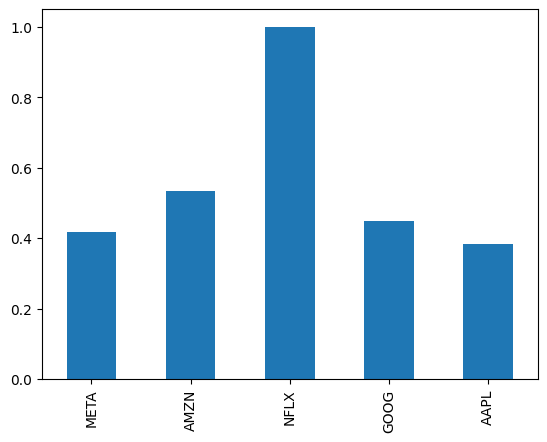

In [168]:
mult_df.corr()['NFLX'].plot(kind='bar')
plt.show()

##### Get the Variance of a Stock

In [172]:
# Remember variance is a measure of how spread out a dataset is 
mult_df['NFLX'].var() *252
# days = len(mult_df.index)

0.11986277619219785

##### Get Covariance of Stocks

Covariance is the measure of the relationship between 2 blocks of data. The covariance of a stock to itself is the variance of that variable. 

In [173]:
mult_df.cov() * 252

,META,AMZN,NFLX,GOOG,AAPL
META,0.077714,0.039685,0.040177,0.038030,0.034371
AMZN,0.039685,0.052486,0.042440,0.033723,0.035273
NFLX,0.040177,0.042440,0.119863,0.037577,0.034693
GOOG,0.038030,0.033723,0.037577,0.058281,0.035195
AAPL,0.034371,0.035273,0.034693,0.035195,0.068321


##### Why Do We Care About Risk

Most investors don't handle massive fluctations in stock prices well. What we want to do at the very least is to make them aware of how dramatically their portfolio returns may be. We can then do our best to minimize risk by adding other stocks that have returns that aren't as closely correlated. 

##### Calculating Portfolio Variance

In [174]:
port_list = ["META", "NEM"]
port_df = merge_df_by_column_name('daily_return', '2019-1-1', '2019-12-31', *port_list)
port_df

,META,NEM
502,0.035014,-0.004907
503,-0.029039,-0.002900
504,0.047138,0.000000
505,0.000725,-0.011926
506,0.032452,0.002944
...,...,...
749,-0.005141,0.009816
750,0.013017,0.012091
751,0.001492,0.000468
752,-0.017732,0.024350


In [175]:
port_df.corr()

,META,NEM
META,1.000000,-0.026918
NEM,-0.026918,1.000000


In [177]:
price_df = merge_df_by_column_name('Adj Close', '2019-1-1', '2019-12-31', *['META', 'NEM'])
price_df.head()

,META,NEM
502,135.536194,28.745726
503,131.600372,28.662367
504,137.803787,28.662367
505,137.903687,28.320551
506,142.378937,28.403929


In [178]:
meta_wt = 209.78 / 418.48
nem_wt = 208.70 / 418.48
meta_wt = .5012
nem_wt = .4988
wts = np.array([meta_wt, nem_wt])
port_var = np.dot(wts.T, np.dot(port_df.cov() * 252, wts))
print("Portfolio Var: ", port_var)
print("META Var: ", port_df['META'].var() * 252)
print("NEM Var: ", port_df['NEM'].var() * 252)

Portfolio Var:  0.03284399455894767
META Var:  0.0777142202847081
NEM Var:  0.057150092058976046
